定义两个1000维的向量

In [2]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

# 生成数据集

我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设训练数据集样本数为1000，输入个数（特征数）为2。给定随机生成的批量样本特征 X∈R1000×2X∈R 
1000×2
 ，我们使用线性回归模型真实权重 w=[2,−3.4]⊤w=[2,−3.4] 
⊤
  和偏差 b=4.2b=4.2，以及一个随机噪声项 ϵϵ 来生成标签

In [3]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
# np.random.normal(0, 0.01, size=labels.size())

# 添加一点噪声
# 其中噪声项 ϵϵ 服从均值为0、标准差为0.01的正态分布。
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

让我们看一下数据

In [4]:
labels

tensor([ 6.7673e+00,  5.2184e+00,  2.1502e+00,  8.0440e+00,  8.0303e+00,
         8.5542e+00,  4.8515e-01, -9.5787e-01,  7.2316e+00,  5.0892e+00,
         6.6731e+00,  7.0895e+00, -1.8750e+00,  1.2225e+01,  3.9429e+00,
         2.9006e+00,  6.6180e+00,  8.9777e+00,  4.8477e+00,  1.2651e+01,
         5.6720e+00,  4.6653e+00,  3.0854e+00,  3.7121e+00, -3.6185e-01,
         4.3513e+00,  6.1439e+00,  3.7668e+00,  4.1311e+00,  3.6397e+00,
         1.0371e+01,  4.3742e+00,  7.7959e+00,  3.4677e+00,  1.0751e+01,
         6.3188e+00,  5.8193e+00, -1.9719e+00,  2.3335e+00,  2.2187e+00,
         6.4343e-01,  1.1298e+01,  5.6814e+00,  2.6240e+00,  4.6090e+00,
         1.5962e+00,  4.9757e+00,  1.5201e+00,  2.2961e+00,  1.3067e+00,
         2.3789e+00,  8.8084e-01,  2.1350e+00, -9.4603e-01,  3.0335e+00,
         1.1216e+01,  8.2564e+00,  2.2608e+00,  6.8384e+00,  3.2639e+00,
         4.3802e+00, -3.1060e+00,  8.7144e-02,  2.7080e+00,  5.3543e+00,
         9.1908e+00, -5.7717e-01,  3.0605e+00,  3.9

In [5]:
torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

tensor([ 3.5138e-03, -8.9300e-03,  3.2253e-03, -1.2908e-02, -1.3177e-02,
         4.4926e-03, -3.1485e-03,  2.3009e-03, -4.8692e-03,  1.5831e-03,
        -1.1715e-02, -4.5971e-03,  2.2136e-03, -3.6457e-04, -5.4663e-03,
         8.5671e-03, -1.7226e-03,  5.6813e-03,  1.0180e-02, -2.5731e-03,
         6.9090e-04, -3.1352e-03, -9.2812e-03, -1.1351e-03,  6.0527e-03,
        -1.4972e-02,  5.8867e-03, -9.8441e-03,  3.2729e-03, -4.0202e-03,
        -4.2547e-03,  7.5234e-03, -4.7031e-03, -1.3080e-02, -7.1335e-04,
         2.6801e-03, -1.2834e-02,  2.4342e-02,  8.1889e-03,  5.6171e-03,
        -1.0473e-02, -1.0845e-02,  2.0517e-02, -1.7195e-03,  1.9721e-03,
        -1.8709e-02,  9.1958e-04, -1.1177e-02,  1.2148e-03, -2.9604e-03,
        -6.5053e-03, -6.6761e-03,  5.8309e-03, -3.1913e-03,  8.9429e-03,
         1.0830e-02,  1.3212e-03, -1.1227e-02,  6.9301e-03,  1.6743e-02,
        -1.0910e-02,  5.7964e-03, -3.1517e-03, -1.2308e-03,  8.0489e-04,
        -3.9330e-03, -1.3251e-02, -8.9466e-04,  1.3

In [16]:
print(features[0], labels[0])

tensor([0.9937, 0.6295]) tensor(4.0487)


In [6]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [7]:
set_figsize()

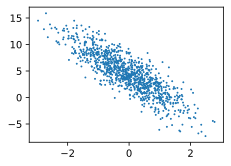

In [13]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

# 读取数据

In [14]:
# 本函数已保存在d2lzh包中方便以后使用
# 这个函数用来一次读取10个数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)  # 1000
    indices = list(range(num_examples))  # 0-1000的list
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):  # 0 10 20 30 ...990
        # min(20 + 10, 1000)，取小的数
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)


In [25]:
min(20 + 10, 1000)

30

In [29]:
a = torch.LongTensor([3, 4, 5, 6])

In [30]:
features.index_select(0, a)

tensor([[ 0.0053, -1.1309],
        [ 1.1402, -0.4503],
        [ 0.4289, -1.0282],
        [ 1.0628,  1.7152]])

In [15]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tensor([[-0.3405, -1.4475],
        [ 0.0429, -0.1673],
        [-0.9121,  0.3345],
        [ 0.2993, -0.2722],
        [ 0.1500,  0.5711],
        [ 0.7785, -0.5715],
        [ 0.6975,  1.0153],
        [-0.0696, -0.6733],
        [-0.1479, -0.4261],
        [ 0.1218, -0.1977]]) tensor([8.4424, 4.8550, 1.2281, 5.7324, 2.5458, 7.7092, 2.1510, 6.3487, 5.3543,
        5.1276])


# 初始化模型参数

In [16]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [31]:
w

tensor([[ 1.9997],
        [-3.4007]], requires_grad=True)

In [32]:
b

tensor([4.1996], requires_grad=True)

In [17]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

# 定义模型

In [18]:
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # torch.mm执行矩阵乘法。
    return torch.mm(X, w) + b

# 定义损失函数

In [19]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

# 定义优化算法

In [20]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

# 训练模型

In [21]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))


epoch 1, loss 0.031099
epoch 2, loss 0.000115
epoch 3, loss 0.000047


In [22]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9997],
        [-3.4007]], requires_grad=True)
4.2 
 tensor([4.1996], requires_grad=True)
